### Imports 
##### (Segregated the imports to exclude any reimports)

In [1]:
import pandas as pd # for working with the dataset

In [2]:
from sklearn.preprocessing import LabelEncoder # label encoder to encode the non numeric values 

In [3]:
from scipy import stats # stats to find the outliars

In [4]:
from sklearn.model_selection import train_test_split # for spliting the data set into train and test
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # for computing the errors
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
import seaborn as sns # for creating graphs and chars
import matplotlib.pyplot as plt # for creating and displaying plots
import numpy as np # for data processing

In [6]:
from sklearn.preprocessing import StandardScaler # for data stadartization

In [7]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

### Reading the data into a pandas dataframe

In [8]:
df = pd.read_csv('Housing.csv'); # using the pandas to read the csv into a dataframe

In [9]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


## 1. Data analysis (initial)

In [10]:
df.columns.tolist() # listing the columns

['price',
 'area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

In [11]:
df.dtypes # checking the data types in the columns

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [12]:
# Check the values in the object columns
for column in df.columns.tolist():
    if df[column].dtype != 'int64':
        display(df[column].value_counts())

mainroad
yes    468
no      77
Name: count, dtype: int64

guestroom
no     448
yes     97
Name: count, dtype: int64

basement
no     354
yes    191
Name: count, dtype: int64

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

airconditioning
no     373
yes    172
Name: count, dtype: int64

prefarea
no     417
yes    128
Name: count, dtype: int64

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

## 2. Data preprocessing (non-numerical to numerical)

In [13]:
furnishingstatus_map = {'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2} # map to encode the furnishing status
df['furnishingstatus'] = df['furnishingstatus'].map(furnishingstatus_map) # encoding the furnishing status

In [14]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,2
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,2
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,1
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,2
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,0
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,1
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,0
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,2


In [15]:
label_encoder = LabelEncoder() # creating a LabelEncoder object 
for column in df.columns:
    if df[column].dtype != 'int64':
        df[column] = label_encoder.fit_transform(df[column]) # using the LabelEncoder to transform the yes-no values to 1 and 0

In [16]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [17]:
df.dtypes # checking the data types

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
basement            int64
hotwaterheating     int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int64
dtype: object

## 3. Data visualisation

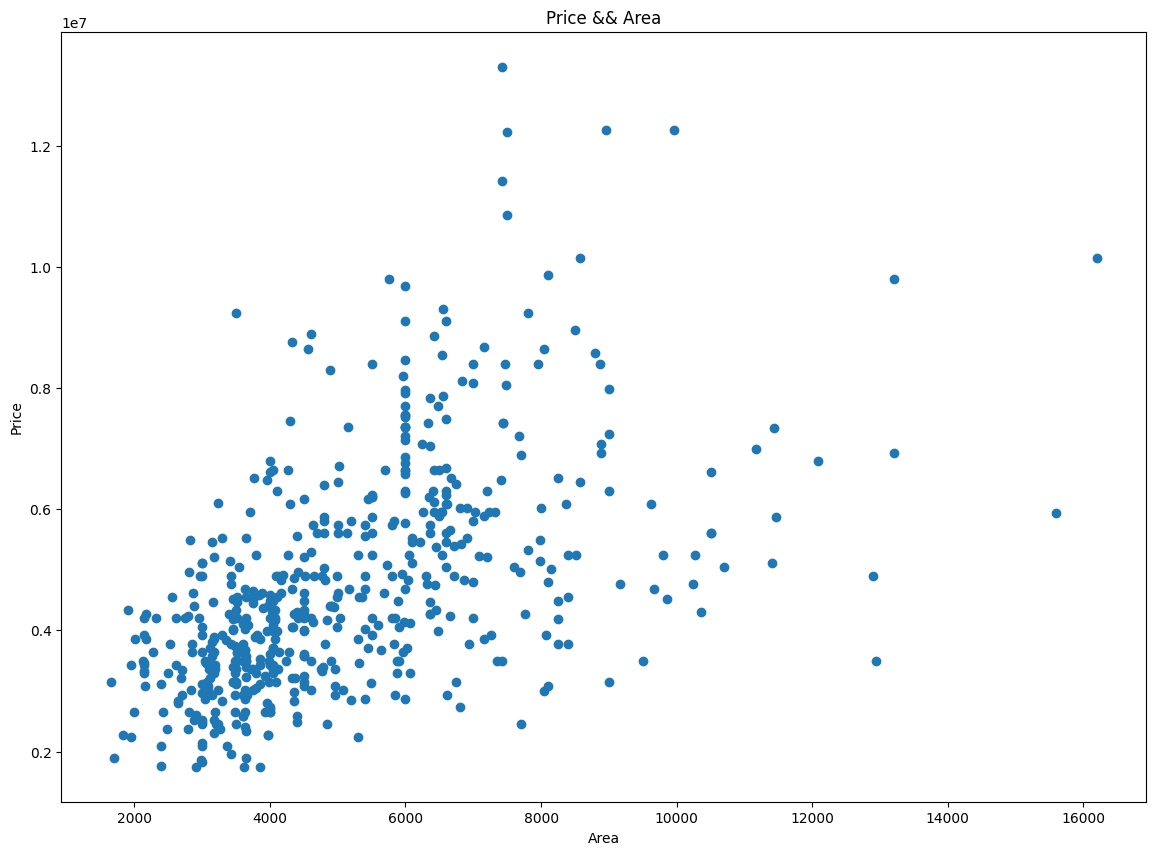

In [18]:
# Ploting the area and the price to see the correlation between them
plt.figure(figsize=(14, 10))
plt.scatter(df['area'], df['price'])
plt.title('Price && Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

So the price and area have a good correlation, 
but there are some values that are a bit off.

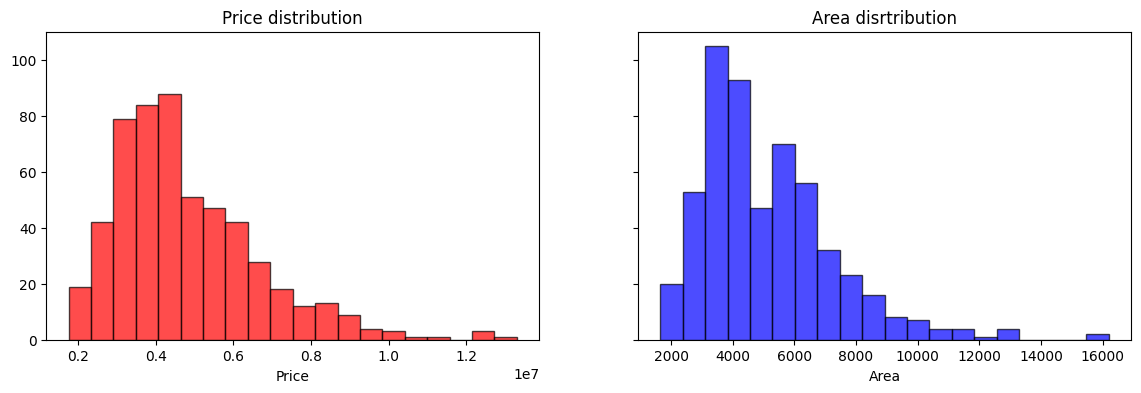

In [19]:
# Plotting the price and area to be able to see the distribution
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4), sharey=True)
plt.subplot(1, 2, 1)
plt.hist(df['price'], bins=20, edgecolor='black', alpha=0.7, color='red')
plt.title('Price distribution')
plt.xlabel('Price')
plt.subplot(1, 2, 2)
plt.hist(df['area'], bins=20, edgecolor='black', alpha=0.7, color='blue')
plt.title('Area disrtribution')
plt.xlabel('Area')
plt.show()

The price distribution is close to normal, but is shifted.
The area distribution is also close to normal and shifted, but has a big dip close to the top

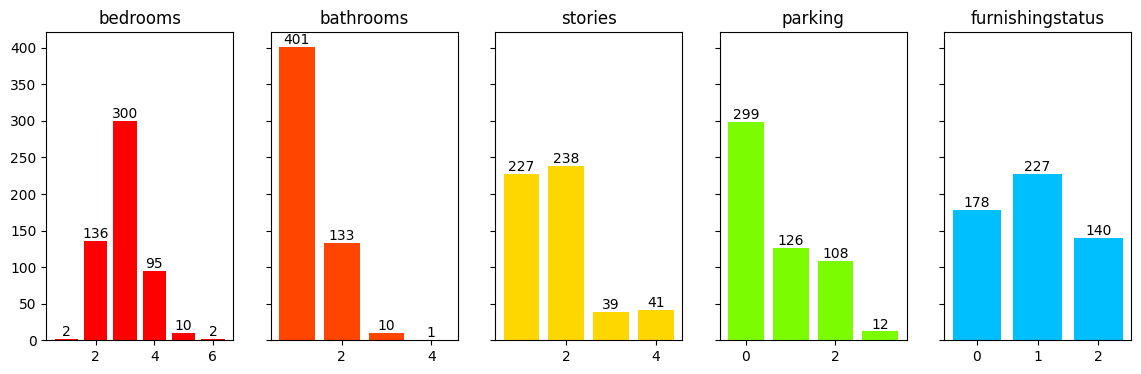

In [20]:
# Ploting the numerical columns and the furnishing status to observe the distribution
cols = ['bedrooms', 'bathrooms', 'stories', 'parking', 'furnishingstatus']
colors = ['red', 'orangered', 'gold', 'lawngreen', 'deepskyblue', 'blue']
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(14, 4), sharey=True)
for i, column in enumerate(cols):
    plt.subplot(1, 5, i+1)
    value_counts = df[column].value_counts()
    bars = plt.bar(value_counts.index, value_counts, color=colors[i])
    plt.bar_label(bars, fmt='%d', label_type='edge', fontsize=10)
    plt.title(column)

The bedrooms and furnishingstatus distributions are close to normal.
The other values distribution is not very normal.

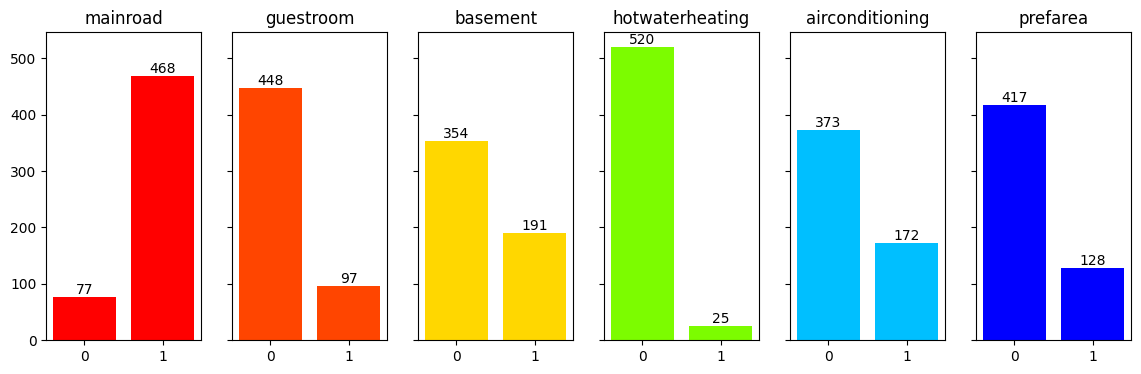

In [21]:
# Plotting the yes-no columns
cols = ['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(14, 4), sharey=True)
for i, column in enumerate(cols):
    plt.subplot(1, 6, i+1)
    value_counts = df[column].value_counts()
    bars = plt.bar(value_counts.index, value_counts, color=colors[i])
    plt.bar_label(bars, fmt='%d', label_type='edge', fontsize=10)
    plt.title(column)

The values are not very equally distributed.

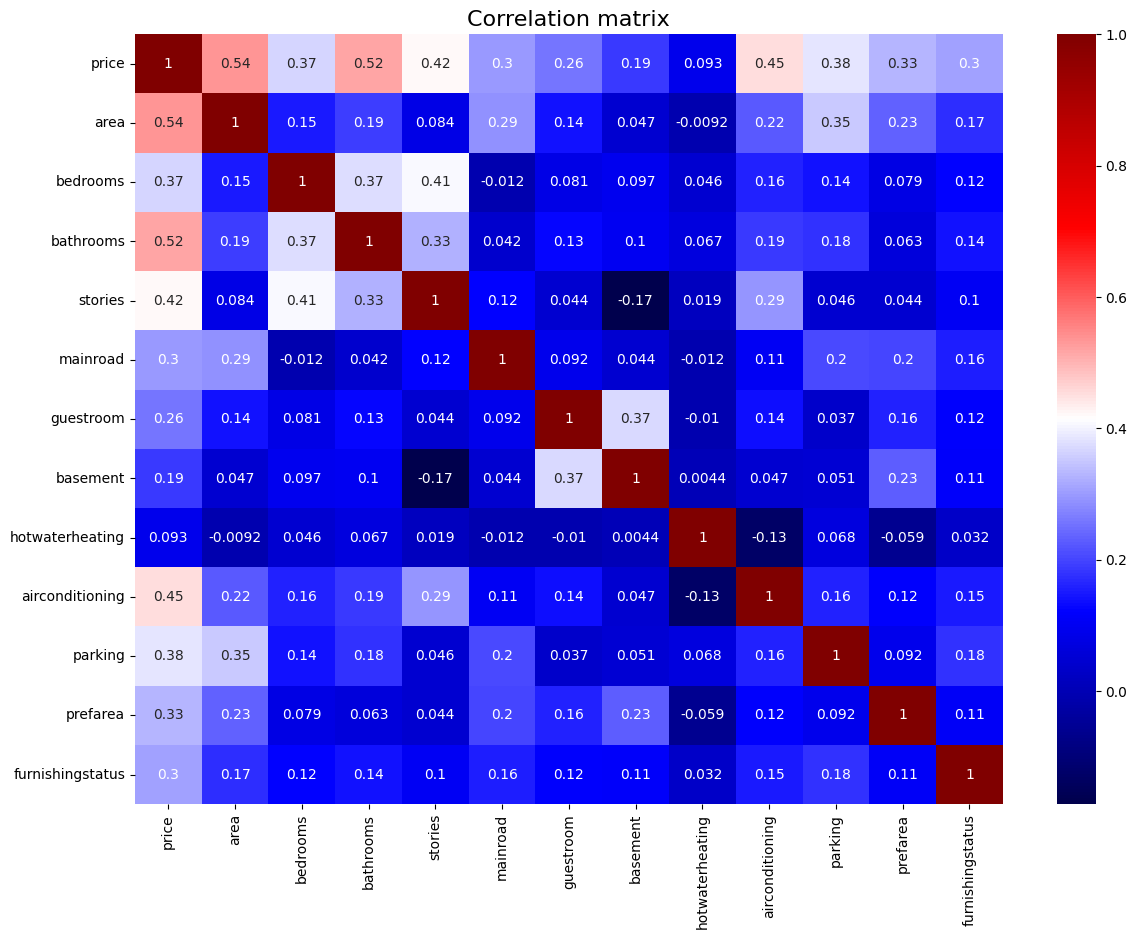

In [22]:
# Plotting a correlation matrix to be see any strong correlation between 2 columns
correlation_matrix = df.corr()
plt.figure(figsize=(14, 10))
plt.title('Correlation matrix', fontsize=16)
sns.heatmap(correlation_matrix, annot=True, cmap='seismic')
plt.show()

As a whole, the columns do not have big correlations between them.
The only big correlations are with the price column, which is expected.
The most influential on the price are the area and bathrooms.
Not so expected is the influence on the price of the airconditioning (relative high)and the hotwaterheating(low).

## 4. Initial try to train

In [23]:
# Separating the dataframe into the 2 parts: the features and the target column
X = df.drop('price', axis=1)
y = df['price']

In [24]:
# Spliting the data into the training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [25]:
# Training a LinearRegression model
lr = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 1075871877438.0101
Mean Absolute Error: 799973.3099355669
R-squared: 0.67690048923763


The model errors magnitudes are very high but R^2 is not so bad.
Therefore I should try to make some changes on the aproach.

## 5. Data analysis (deeper) and preprocessing with visualization

In [26]:
df.describe() # Checking the dataframe stats

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.930275
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [27]:
# Computing the z_scores
z_scores = pd.DataFrame(stats.zscore(df))
z_scores

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,1.406286
1,4.004484,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,1.406286
2,4.004484,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,0.091662
3,3.985755,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,1.406286
4,3.554979,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,1.406286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.576868,-0.991879,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,-0.554035,-1.222962
541,-1.605149,-1.268613,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,0.091662
542,-1.614327,-0.705921,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-1.222962
543,-1.614327,-1.033389,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,1.406286


In [28]:
# Eliminating the outliars based on z_scores
outliers = (z_scores > 3).any(axis=1)
df1 = df[~outliers]

In [29]:
df1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,2
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0
12,9310000,6550,4,2,2,1,0,0,0,1,1,1,1
14,9240000,7800,3,2,2,1,0,0,0,0,0,1,1
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


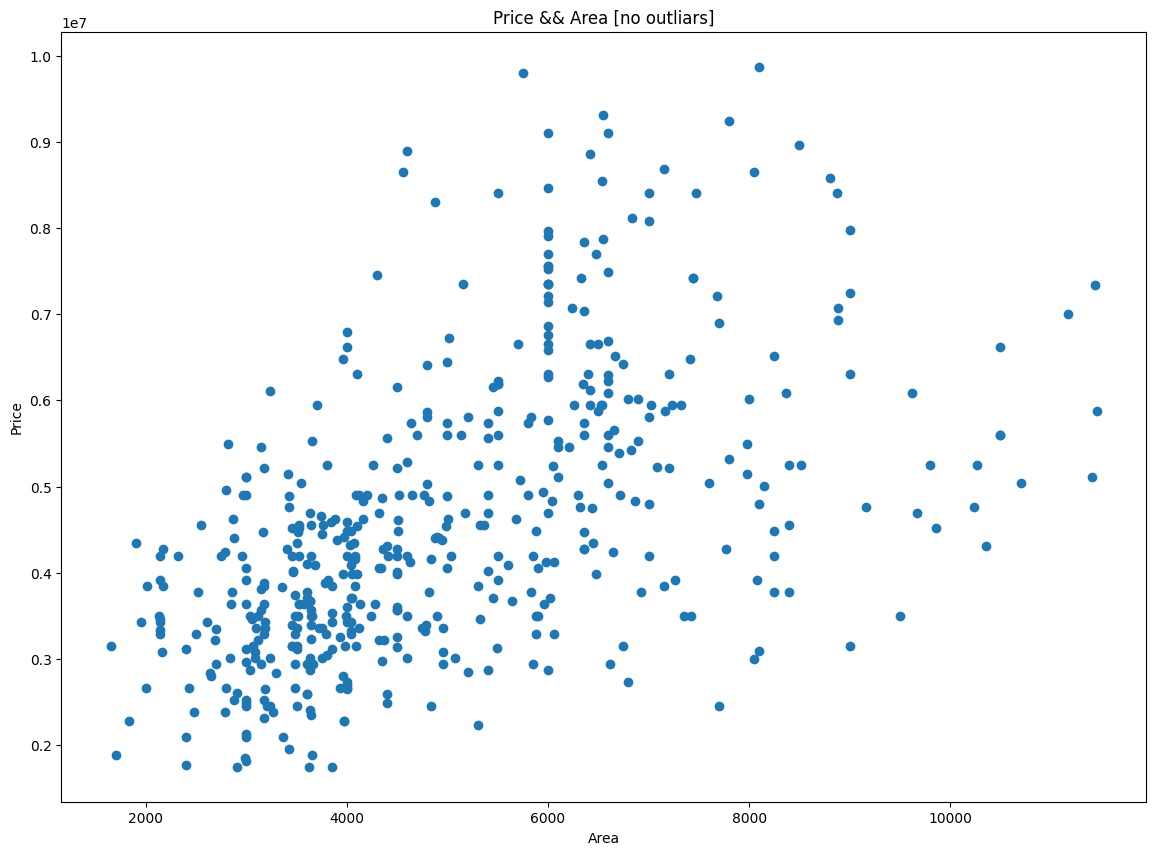

In [30]:
plt.figure(figsize=(14, 10))
plt.scatter(df1['area'], df1['price'])
plt.title('Price && Area [no outliars]')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

The points are cleaner now, with no obvious values that are off relative to the others

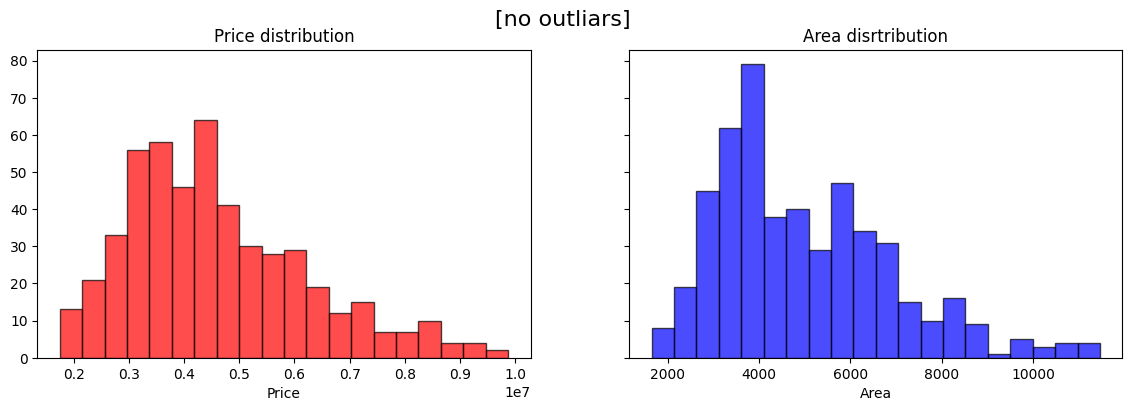

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4), sharey=True)
plt.suptitle('[no outliars]', fontsize=16)
plt.subplot(1, 2, 1)
plt.hist(df1['price'], bins=20, edgecolor='black', alpha=0.7, color='red')
plt.title('Price distribution')
plt.xlabel('Price')
plt.subplot(1, 2, 2)
plt.hist(df1['area'], bins=20, edgecolor='black', alpha=0.7, color='blue')
plt.title('Area disrtribution')
plt.xlabel('Area')
plt.show()

The price distribution got better, but got a dip in the center, creating 2 tops. The area distribution got a bit worse.

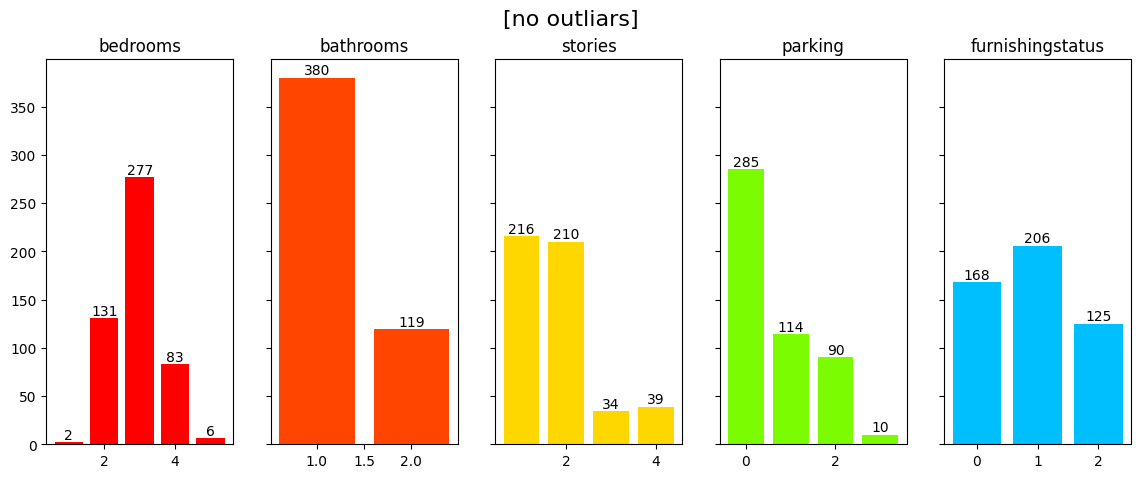

In [32]:
cols = ['bedrooms', 'bathrooms', 'stories', 'parking', 'furnishingstatus']
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(14, 5), sharey=True)
plt.suptitle('[no outliars]', fontsize=16)
for i, column in enumerate(cols):
    plt.subplot(1, 5, i+1)
    value_counts = df1[column].value_counts()
    bars = plt.bar(value_counts.index, value_counts, color=colors[i])
    plt.bar_label(bars, fmt='%d', label_type='edge', fontsize=10)
    plt.title(column)

Lost variance in the bathroom column, the other columns are relatively the same

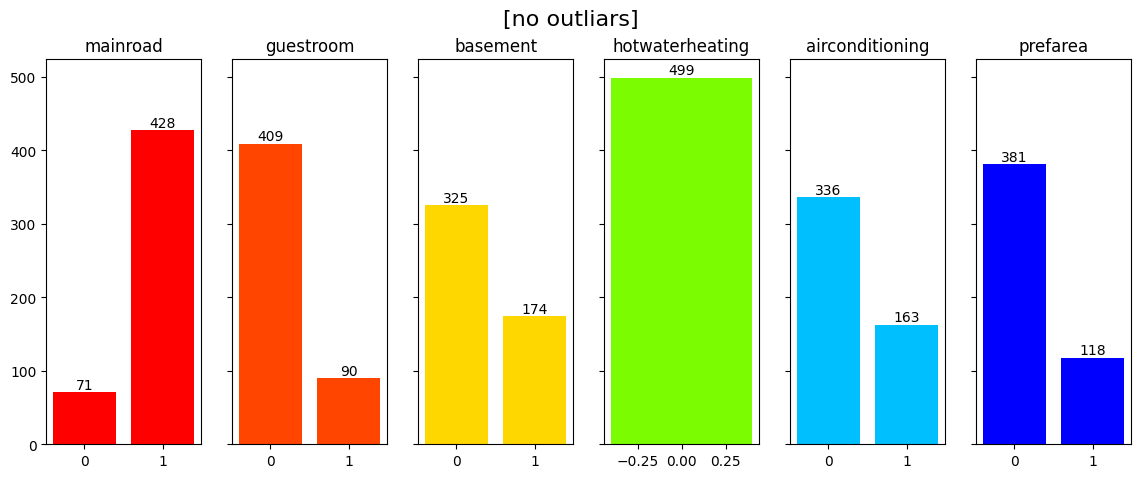

In [33]:
cols = ['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(14, 5), sharey=True)
plt.suptitle('[no outliars]', fontsize=16)
for i, column in enumerate(cols):
    plt.subplot(1, 6, i+1)
    value_counts = df1[column].value_counts()
    bars = plt.bar(value_counts.index, value_counts, color=colors[i])
    plt.bar_label(bars, fmt='%d', label_type='edge', fontsize=10)
    plt.title(column)

The hotwaterheating column values are constant now, thus it will have no effect on the model.

In [34]:
df1 = df1.drop('hotwaterheating', axis=1) # Decided to remove the hotwaterheating column as its values are constant

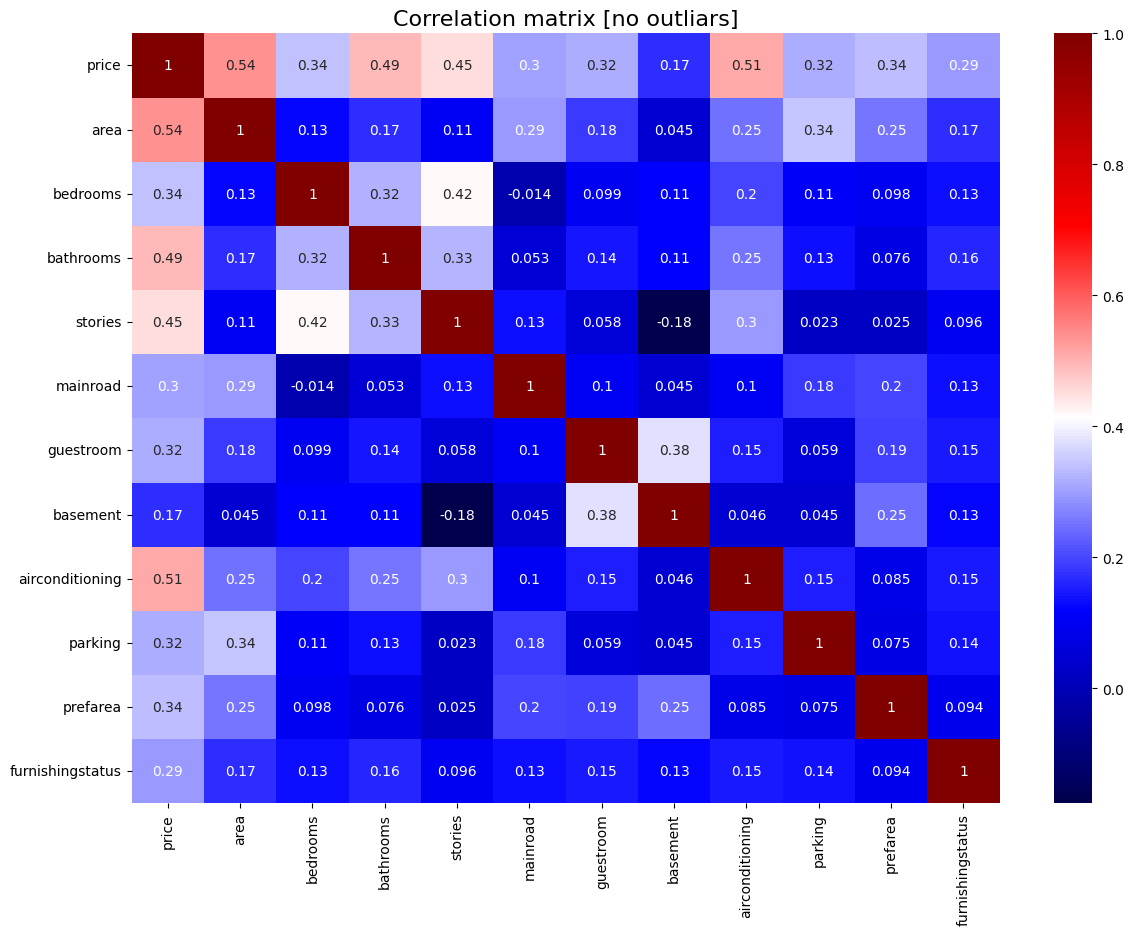

In [35]:
correlation_matrix = df1.corr()
plt.figure(figsize=(14, 10))
plt.title('Correlation matrix [no outliars]', fontsize=16)
sns.heatmap(correlation_matrix, annot=True, cmap='seismic')
plt.show()

The influence of the bathrooms has deacreased a little, but the influence of the airconditioning and stories had rissen

## 6. Second training of the model, now training 3 different models

In [36]:
# Separating the dataframe into the 2 parts: the features and the target column
X = df1.drop('price', axis=1)
y = df1['price']

In [37]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
8,8100,4,1,2,1,1,1,1,2,1,2
9,5750,3,2,4,1,1,0,1,1,1,0
12,6550,4,2,2,1,0,0,1,1,1,1
14,7800,3,2,2,1,0,0,0,0,1,1
15,6000,4,1,2,1,0,1,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,2,0,0
541,2400,3,1,1,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0
543,2910,3,1,1,0,0,0,0,0,0,2


In [38]:
# Spliting the data into the training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [39]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
382,3150,3,1,2,1,0,1,0,0,0,2
400,3512,2,1,1,1,0,0,0,1,1,0
134,7000,3,1,1,1,0,1,0,2,1,1
65,8880,3,2,2,1,0,1,1,1,0,2
495,4000,3,1,2,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
242,3640,3,1,2,1,0,0,1,0,0,2
88,7410,3,1,1,1,1,1,1,2,1,0
40,6550,3,1,2,1,0,1,1,0,1,2
227,6000,2,1,1,1,0,1,1,1,0,2


In [40]:
# Training a LinearRegression model
lr = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 747784661551.87
Mean Absolute Error: 647939.0362590362
R-squared: 0.702422904711089


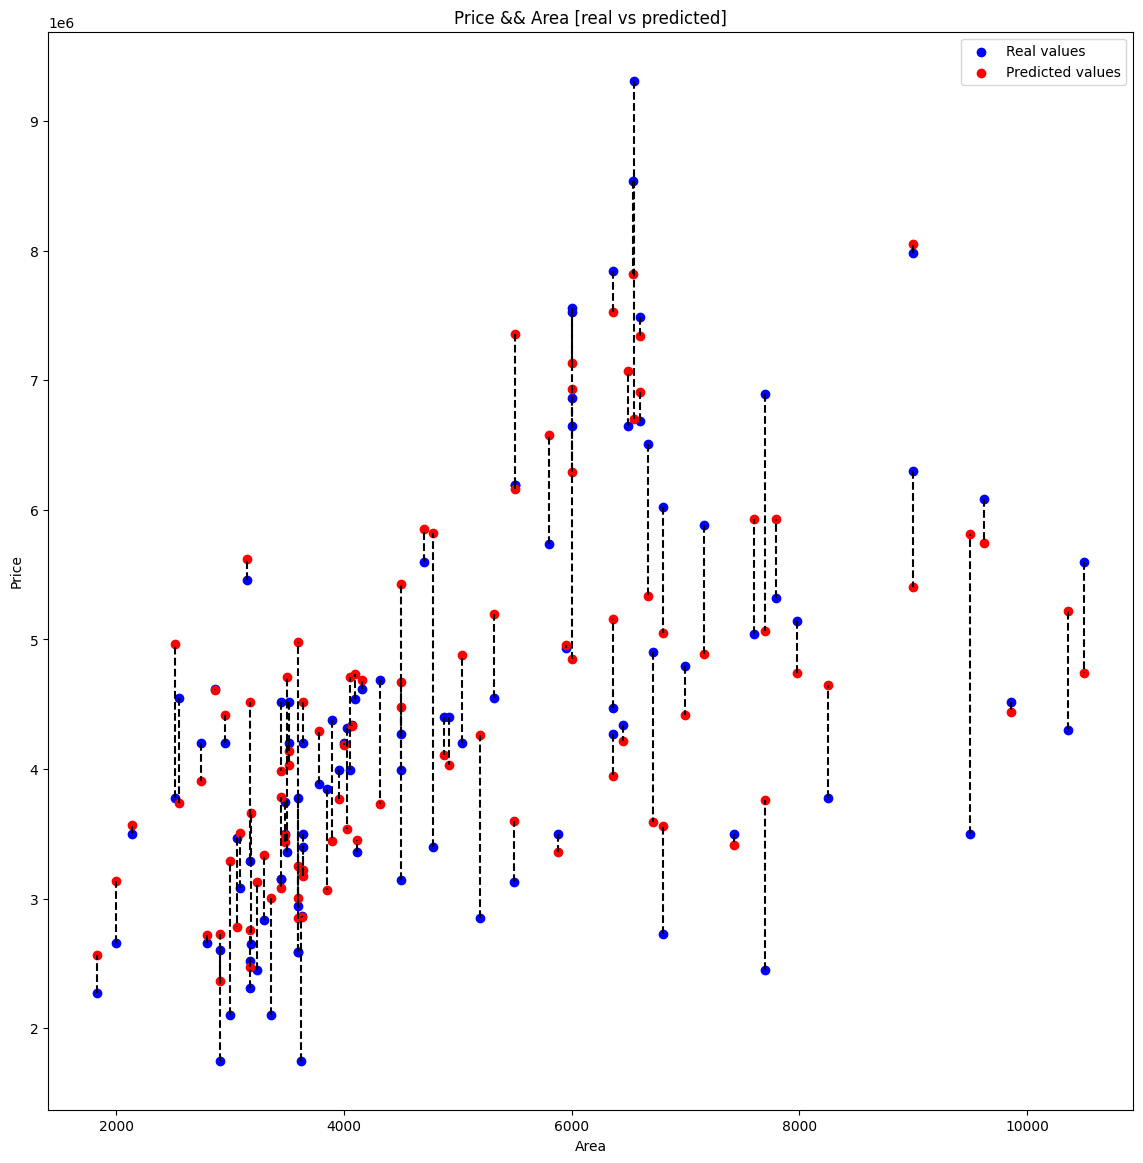

In [41]:
# Visualizing the results
plt.figure(figsize=(14, 14))
plt.scatter(X_test['area'], y_test, label='Real values', color='blue')
plt.scatter(X_test['area'], y_pred, label='Predicted values', color='red')
for i in range(len(X_test['area'])):
    plt.plot([X_test['area'].iloc[i], X_test['area'].iloc[i]], [y_test.iloc[i], y_pred[i]], color='k', linestyle='--')
plt.title('Price && Area [real vs predicted]')
plt.legend()
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [42]:
# Training a RandomForestRegressor model
rf = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=None, min_samples_split=2, 
                           min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, 
                           min_impurity_decrease=0.0, bootstrap=True, oob_score=True, n_jobs=None, random_state=56, 
                           verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 612760465336.8969
Mean Absolute Error: 613018.497
R-squared: 0.7561550954997932


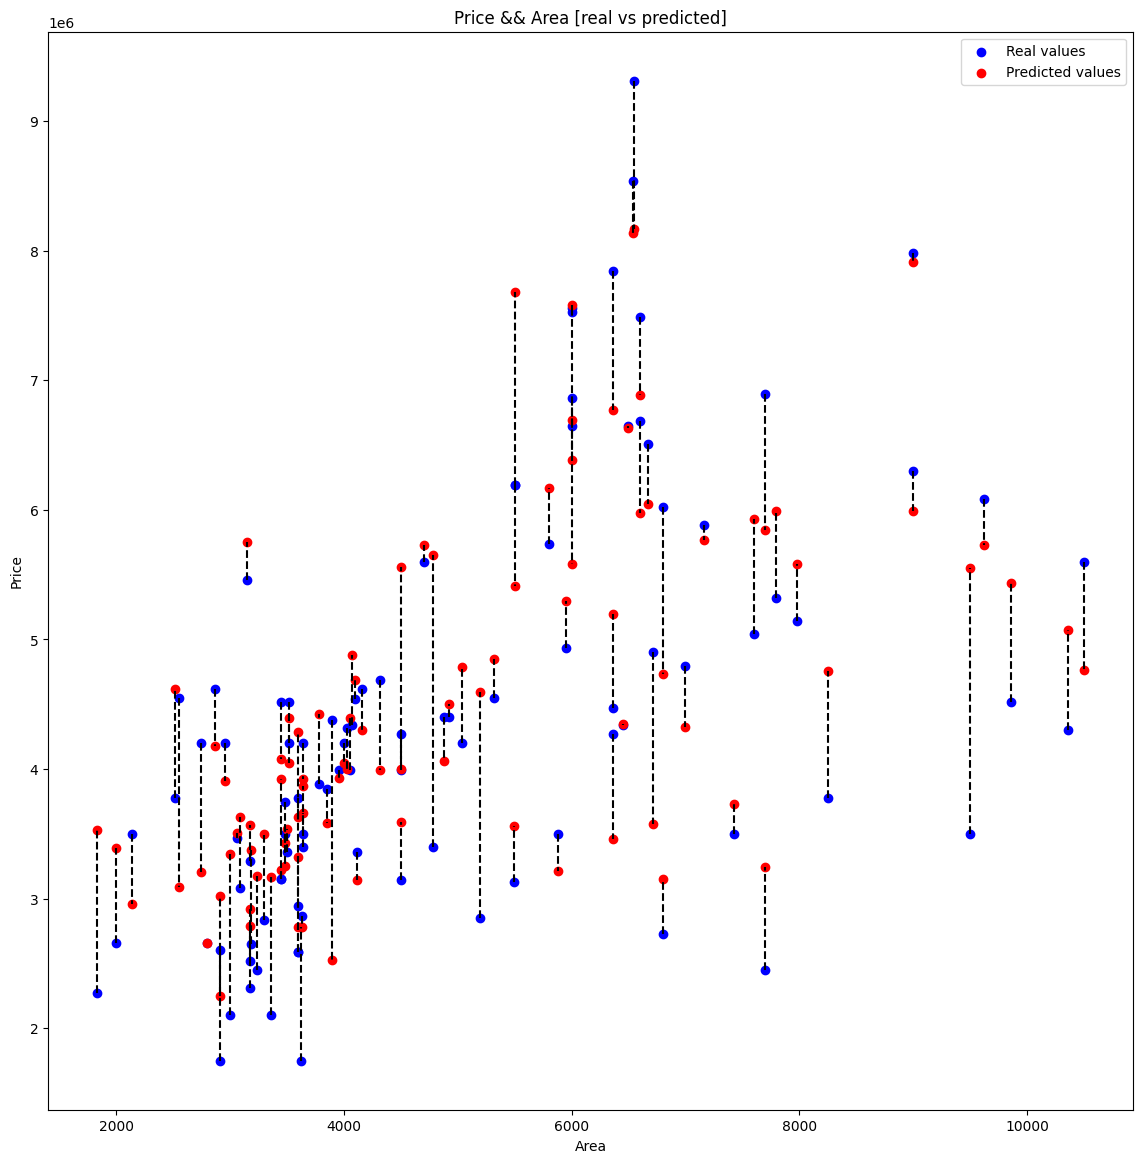

In [43]:
# Visualizing the results
plt.figure(figsize=(14, 14))
plt.scatter(X_test['area'], y_test, label='Real values', color='blue')
plt.scatter(X_test['area'], y_pred, label='Predicted values', color='red')
for i in range(len(X_test['area'])):
    plt.plot([X_test['area'].iloc[i], X_test['area'].iloc[i]], [y_test.iloc[i], y_pred[i]], color='k', linestyle='--')
plt.title('Price && Area [real vs predicted]')
plt.legend()
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [44]:
# Training a GradientBoostingRegressor model
gb = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', 
                                min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, 
                                min_impurity_decrease=0.0, init=None, random_state=43, max_features=None, alpha=0.9, verbose=0, 
                                max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, 
                                ccp_alpha=0.0)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 737845938460.2264
Mean Absolute Error: 662975.6613815612
R-squared: 0.7063779689168115


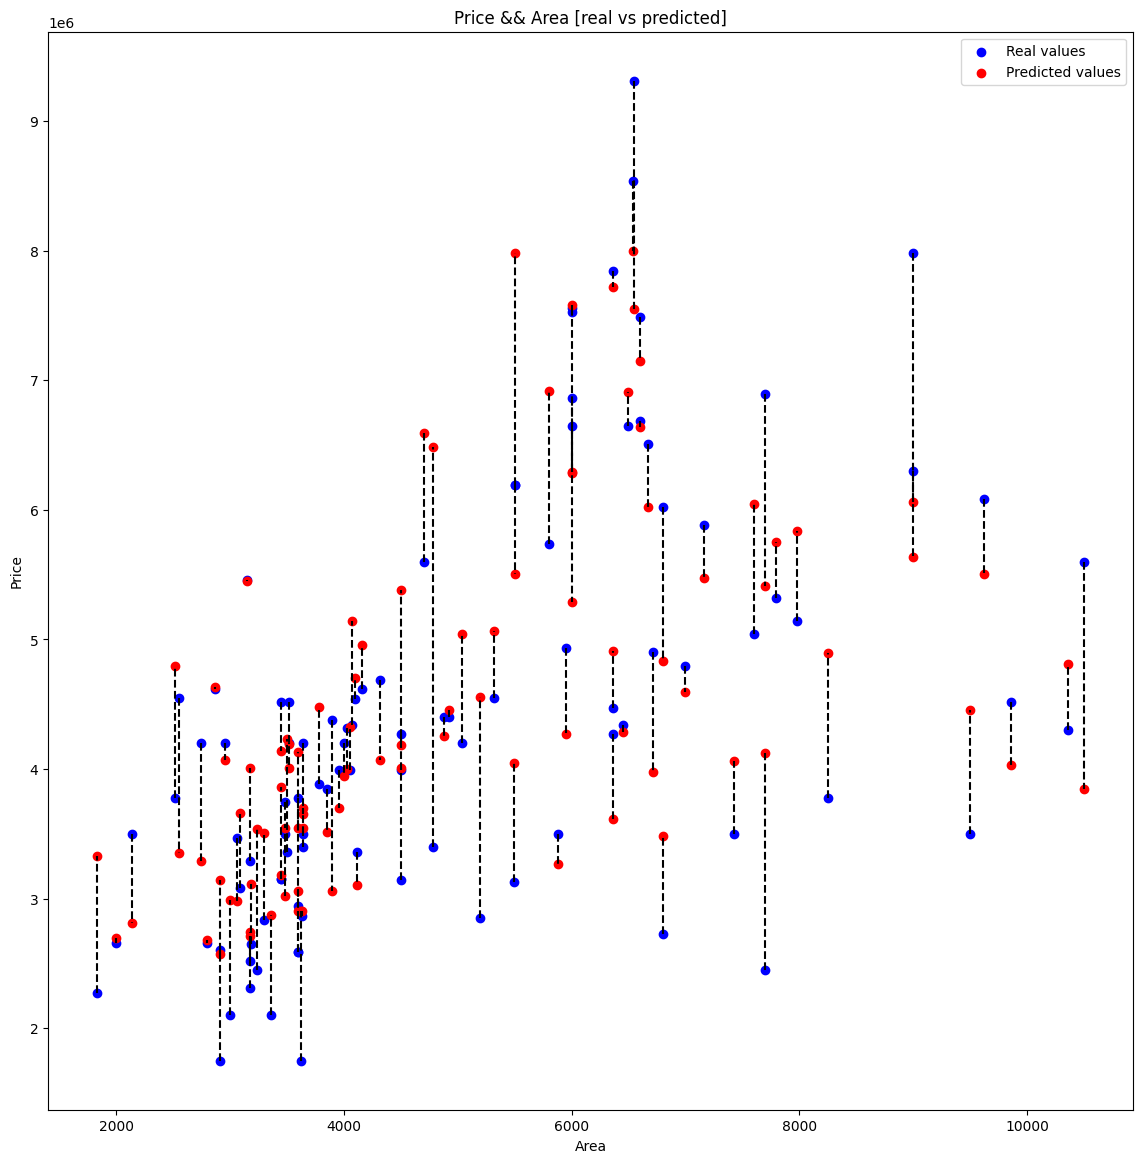

In [45]:
# Visualizing the results
plt.figure(figsize=(14, 14))
plt.scatter(X_test['area'], y_test, label='Real values', color='blue')
plt.scatter(X_test['area'], y_pred, label='Predicted values', color='red')
for i in range(len(X_test['area'])):
    plt.plot([X_test['area'].iloc[i], X_test['area'].iloc[i]], [y_test.iloc[i], y_pred[i]], color='k', linestyle='--')
plt.title('Price && Area [real vs predicted]')
plt.legend()
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

So I got a not so bad R^2 value, but it also can not be considered good. The best results are with the RandomForestRegression

## 7. Standartization of the data and third training

### 7.1.Standartizing the features

In [46]:
# Separating the dataframe into the 2 parts: the features and the target column
X = df1.drop('price', axis=1)
y = df1['price']

In [47]:
# Standartizing the columns
scaler = StandardScaler()
for column in X.columns:
    X[column] = scaler.fit_transform(np.array(X[column]).reshape(-1, 1))

In [48]:
# Spliting the data into the training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [49]:
# Training a LinearRegression model
lr = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 747784661551.874
Mean Absolute Error: 647939.0362590387
R-squared: 0.7024229047110874


In [50]:
# Training a RandomForestRegressor model
rf = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=None, min_samples_split=2, 
                           min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, 
                           min_impurity_decrease=0.0, bootstrap=True, oob_score=True, n_jobs=None, random_state=56, 
                           verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 609997853757.8605
Mean Absolute Error: 612013.7030000001
R-squared: 0.757254462699162


In [51]:
gb = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', 
                                min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, 
                                min_impurity_decrease=0.0, init=None, random_state=43, max_features=None, alpha=0.9, verbose=0, 
                                max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, 
                                ccp_alpha=0.0)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 737845938460.2264
Mean Absolute Error: 662975.6613815612
R-squared: 0.7063779689168115


Got the same results as before.

### 7.2 Standartizing all the columns

In [52]:
# Separating the dataframe into the 2 parts: the features and the target column
X = df1.drop('price', axis=1)
y = df1['price']

In [53]:
scaler = StandardScaler()
for column in X.columns:
    X[column] = scaler.fit_transform(np.array(X[column]).reshape(-1, 1))
y = scaler.fit_transform(np.array(y).reshape(-1, 1))
y = y.ravel()

In [54]:
# Spliting the data into the training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [55]:
# Training a LinearRegression model
lr = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.28068647334175834
Mean Absolute Error: 0.39696901636514914
R-squared: 0.7024229047110874


In [56]:
# Training a RandomForestRegressor model
rf = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=None, min_samples_split=2, 
                           min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, 
                           min_impurity_decrease=0.0, bootstrap=True, oob_score=True, n_jobs=None, random_state=56, 
                           verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.22728329405787945
Mean Absolute Error: 0.37376708292337013
R-squared: 0.7590396799382301


In [57]:
gb = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', 
                                min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, 
                                min_impurity_decrease=0.0, init=None, random_state=43, max_features=None, alpha=0.9, verbose=0, 
                                max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, 
                                ccp_alpha=0.0)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.2769559005210674
Mean Absolute Error: 0.4061814174558481
R-squared: 0.7063779689168117


The errors are very good if all columns standartized, but R^2 is the same.
After some research I came to the conclusion that this is not the best thing to do, and after some thinking I understood that this happens only because the magnitude numbers becomes much smaller, thus the magnitude of the errors also decreases.

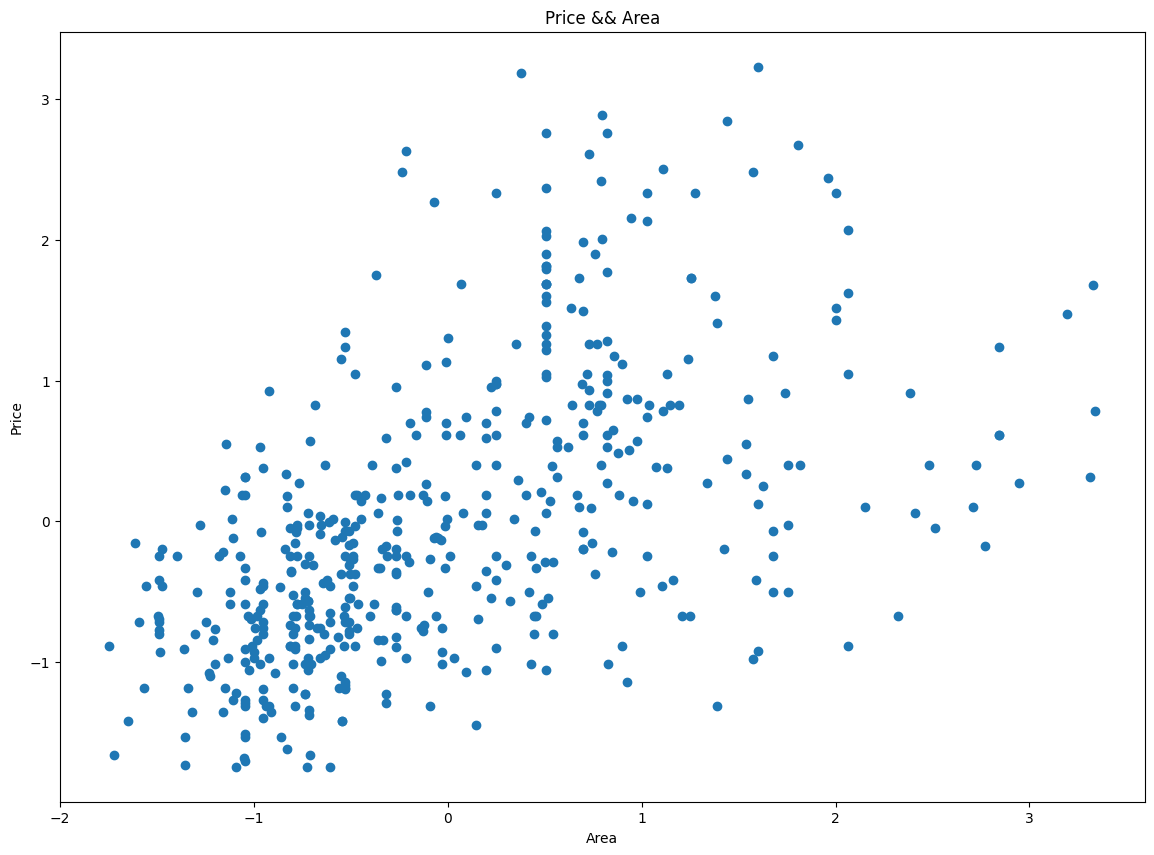

In [58]:
# Ploting the area and the price to see the correlation between them
plt.figure(figsize=(14, 10))
plt.scatter(X['area'], y)
plt.title('Price && Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

As can be seen in this graph the distribution of the points did not change, only the magnitude of the values.

Also a very important thing is that if you want to get any good results you need to standartize the data you introduce and destantartize the data you get out.

## 8. Automatic hyperparameter tunning

In [59]:
# rf = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=None, min_samples_split=2, 
                           # min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, 
                           # min_impurity_decrease=0.0, bootstrap=True, oob_score=True, n_jobs=None, random_state=56, 
                           # verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

In [60]:
rf = RandomForestRegressor();

In [61]:
param_dist = {
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'n_estimators': [i for i in range(1, 301)],
    'random_state': [i for i in range(1, 201)],
    'bootstrap': [True, False]
}

In [ ]:
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=200)
search = random_search.fit(X_train, y_train)

In [ ]:
search.best_params_

In [ ]:
# Training a RandomForestRegressor model
rf = RandomForestRegressor(**search.best_params_)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Even with auto search of the hyper-parameters I could not get a better result than the one I got by just randomly chosing them, so, I think this is it.